# Demonstrate Nucleosome Clustering with the Sliding Nucleosome Model

Simulation of the sliding nucleosome model with the following parameters:

- Number of marks: 1
- Correlation in methylation pattern: FALSE
- Maximum number of binders per mark: 2

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([-9.5])

# Generate a methylation sequence
n_beads = 500
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
linker_lengths = np.ones(marks.shape[0])
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

In [4]:
# Print the methylation pattern
print("Methylation Pattern (flattened, single mark):\n")
print(marks.flatten())

Methylation Pattern (flattened, single mark):

[1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

#### Initialize the Nucleosome Array

In [5]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

#### Specify Simulation Parameters

In [6]:
out_dir = "output"
n_steps = 1000
n_save = 1

#### Run the Simulation

In [7]:
mc.mc_linkers(nuc_arr, n_save, n_steps, out_dir)

#### Inspect Configuration

In [8]:
# Extract the linker length distribution
linker_lengths = nuc_arr.linker_lengths

# Print the linker lengths
print("Linker Lengths:")
print(linker_lengths)

Linker Lengths:
[ 51.   7.  90.  13.  26.   2.  58.  16.  86.   1.  25.  47.  22.  85.
   6.  13.   1.  53.   1.   7.   9.  58.  31. 219.   1.   1.  82.   3.
   1.   1.  41.   1.  52.  31.  19.  26.  61.  66. 154.  24.  25.  43.
  72.  72. 124.   9.  11.  12.   1.  16.  94.   6.  59.  20.  37.  22.
  40.  53.  97.  39.  41.  18.  57.  38.  23.   1.  14.  11.   1.  53.
 142.   4.  54.  10.   3.  20.   5.   1.  35.  81.  47.  25.  69.  90.
   9.   1.  47.   1.   1.   6.   1.  33.  14.  65.   3.  86.  43.  17.
   1.  28.   2.   1. 101.  13.   4.  18.   1.  53. 282.   9.  30.  27.
   6.  82.  49.  30. 127.  11.  65.  39.  94.  71.  18.  17. 126. 106.
  12.  16.   1.   1.   5.   1.  30.   2. 180.  18.  20.   5. 111.  56.
  14.  10.  51.   1. 119.   1.  36.  26.   2.   2.   1.  94.  33.  57.
  28. 102. 177.  30.   3.   1.   1.  34.   2.  47.   7.  16.  62.   5.
  11.  41.  46.  39.   8. 140.  51.  31.   1.  76.   1.  28.   1.  24.
  20.  32.  10.  47.  12.  30.   1.  88.  94.  48.  55.   1. 

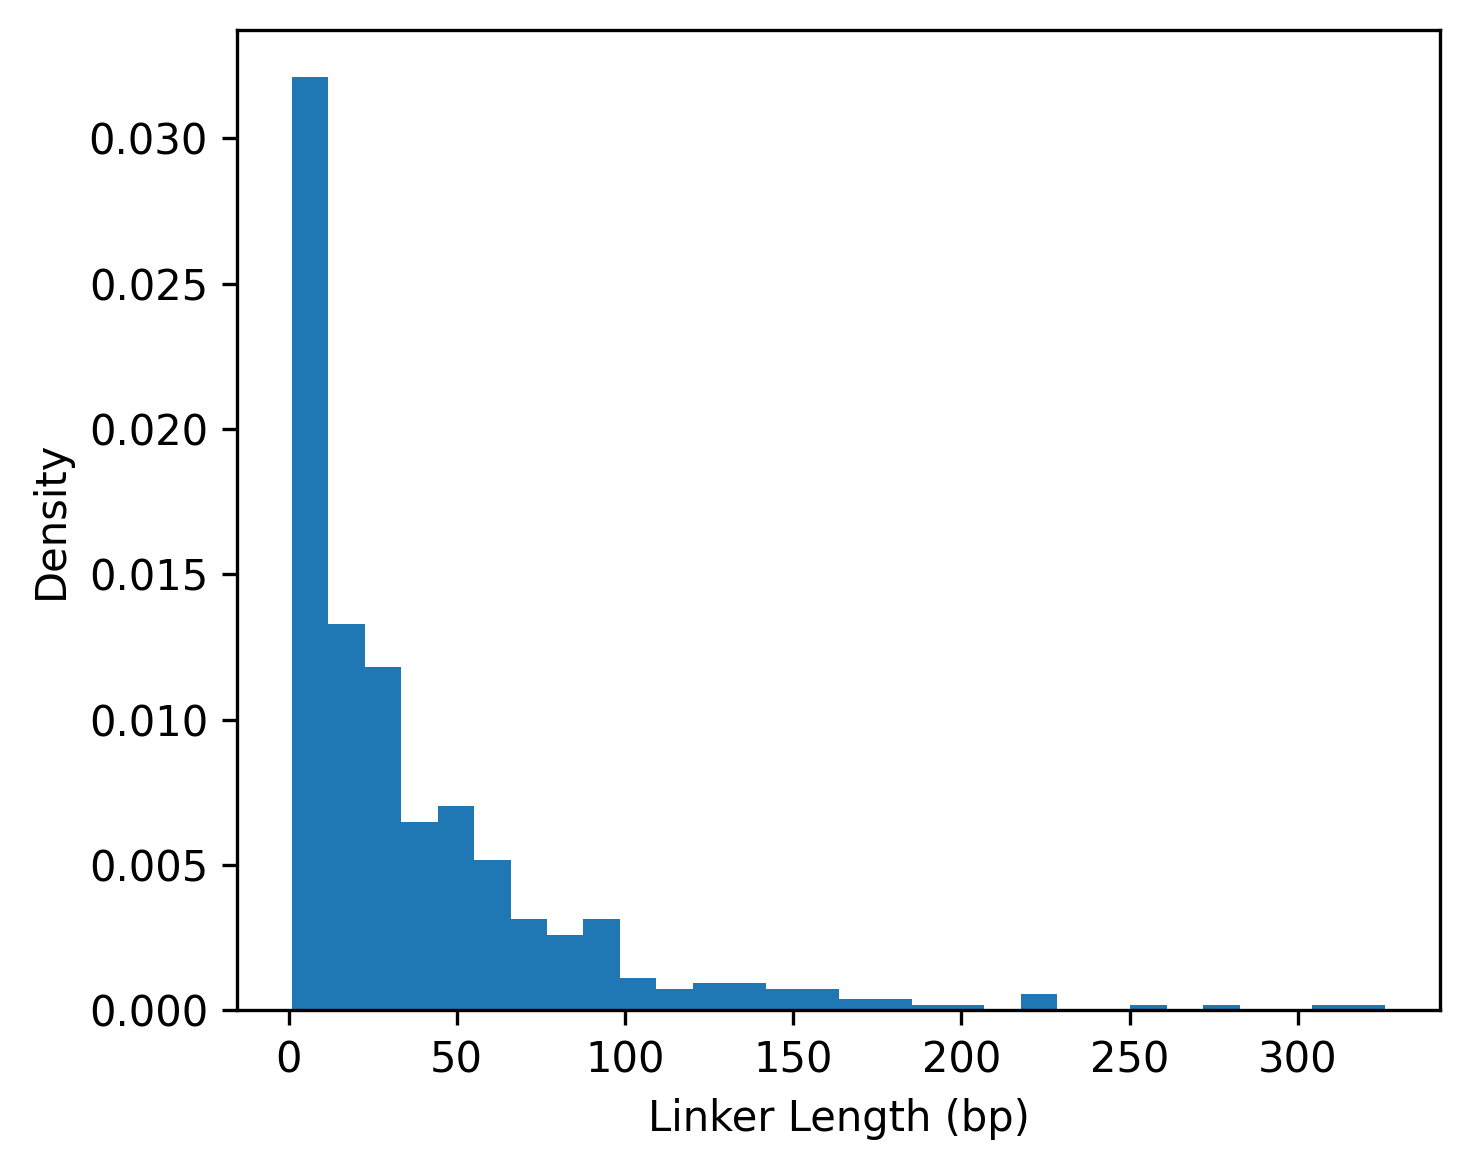

In [9]:
# Plot the linker length distribution
nbins = 30
plt.figure(figsize=(5,4), dpi=300)
plt.hist(linker_lengths, bins=nbins, density=True)
plt.xlabel("Linker Length (bp)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

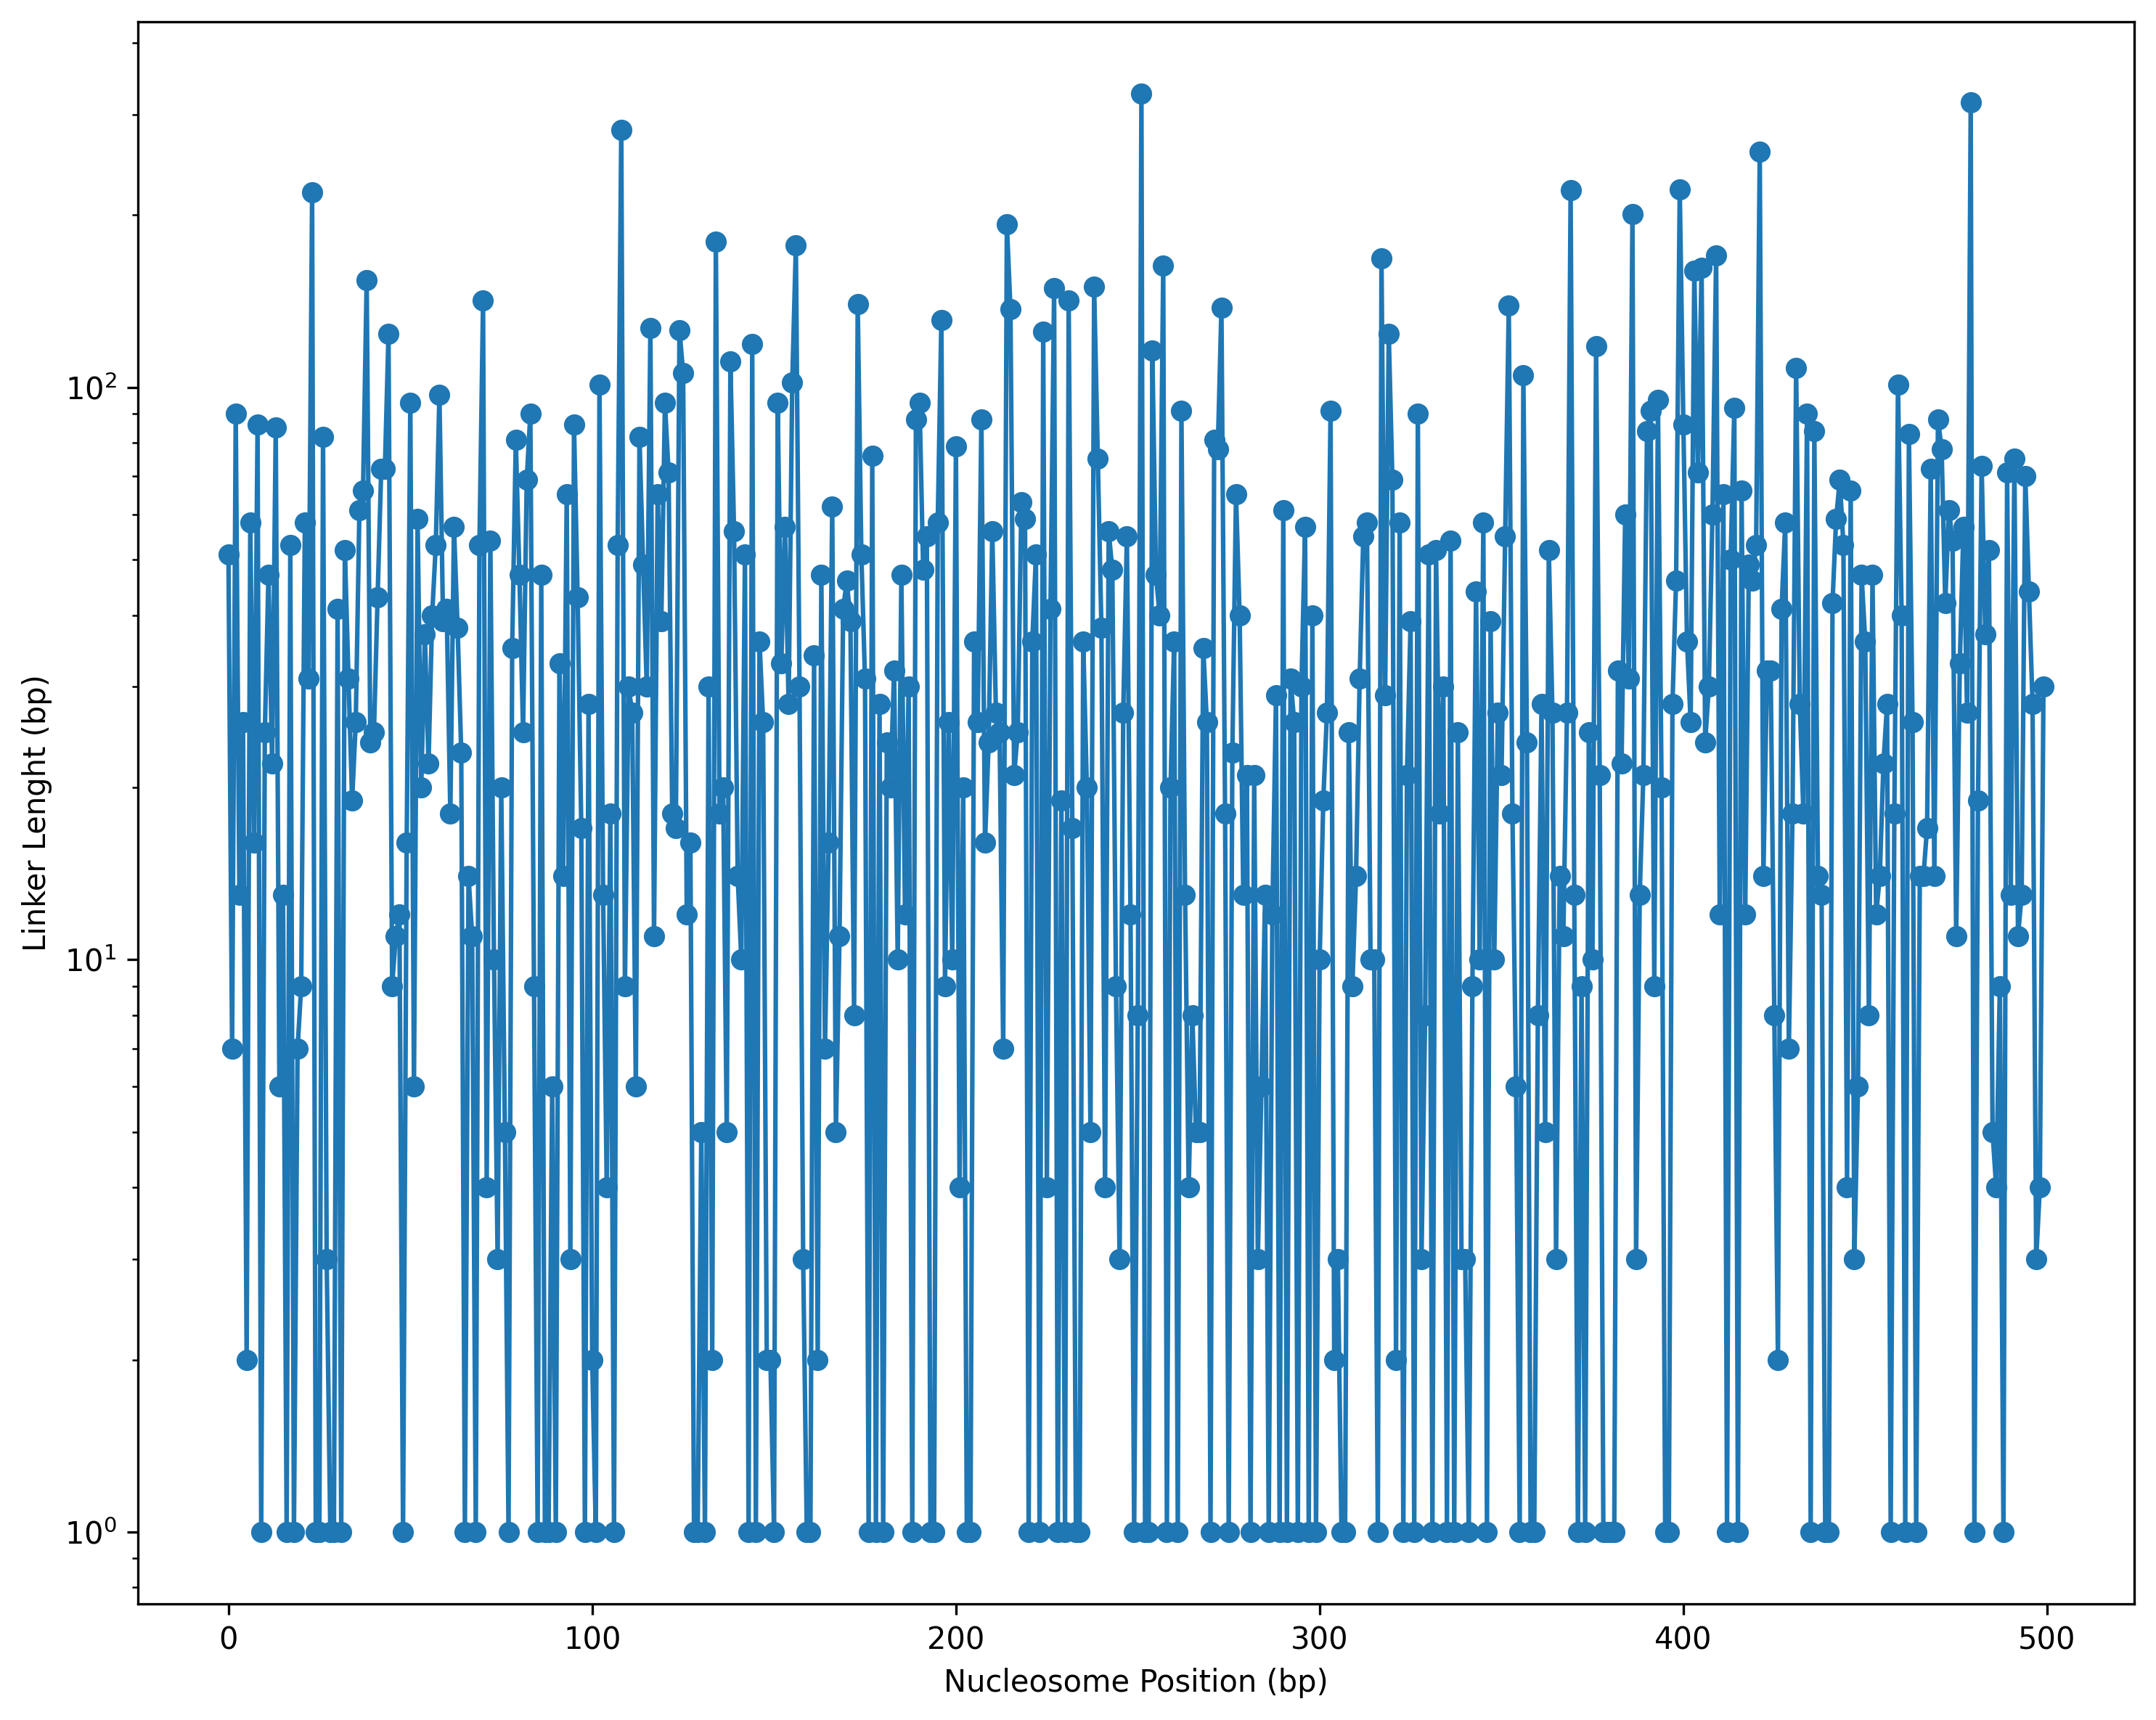

In [10]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()